# Multiple linear regression model

In [12]:
# library for data analsysis
import numpy as np

# library to handle data in a vectorized manner
import pandas as pd

## Matplotlib and associated plotting modules
import matplotlib.pyplot as plt

# To access statistics functions
import scipy.stats as ss
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
# Inpmort linear regression function 
from sklearn.linear_model import LinearRegression

# To compute the square root function 
from math import sqrt

# Optinal, but execution of this command ensures the plot displayed directly below the code cell that produced it. 
# The resulting plots will then also be stored in the notebook document.
%matplotlib inline
import matplotlib
font = {'family' : 'Times new Roman',
        'size'   : 15}

matplotlib.rc('font', **font)

## Load the data. 

In [13]:
df = pd.read_csv('Diet_R.csv')
df.head(5)

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks
0,25,0,41,171,60,2,60.0
1,26,0,32,174,103,2,103.0
2,1,0,22,159,58,1,54.2
3,2,0,46,192,60,1,54.0
4,3,0,55,170,64,1,63.3


In [14]:
X = df.iloc[:, 1:6]
Y = np.asarray(df.iloc[:, 6]).reshape(-1,1)
print (X) # show the selected variables

    gender  Age  Height  pre.weight  Diet
0        0   41     171          60     2
1        0   32     174         103     2
2        0   22     159          58     1
3        0   46     192          60     1
4        0   55     170          64     1
..     ...  ...     ...         ...   ...
73       1   35     183          83     3
74       1   49     177          84     3
75       1   28     164          85     3
76       1   40     167          87     3
77       1   51     175          88     3

[78 rows x 5 columns]


In [15]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.70, random_state=0)

In [16]:
scaler = preprocessing.StandardScaler()

X_train = scaler.fit_transform(X_train)
Y_train = scaler.fit_transform(Y_train)
X_test = scaler.fit_transform(X_test)
Y_test = scaler.fit_transform(Y_test)

Y_train = Y_train.reshape(-1)
Y_test = Y_test.reshape(-1)

In [17]:
# define the LR function 
MLR = LinearRegression()  

#Define the RFR function with the set of data to be used for learning/training 
MLR = MLR.fit(X_train, Y_train) 

## Train the LR model

In [18]:
MLR_pred_train_ZPT = MLR.predict(X_train)
MLR_pred_test_ZPT = MLR.predict(X_test)

## Data Visualisation 

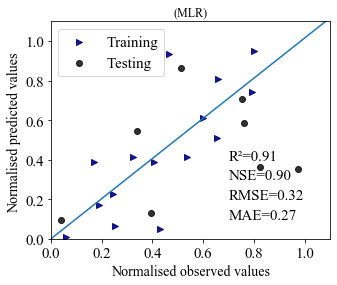

In [25]:
#Define the size of the figure
plt.figure(figsize=(5,4))

# Define the color, label, marker
plt.scatter(MLR_pred_train_ZPT,Y_train, alpha=0.9, color='navy',marker='>',label='Training')
plt.scatter(MLR_pred_test_ZPT, Y_test, alpha=0.8, color='black', marker='o',label='Testing')

# Define the position of legend 
plt.legend(loc='upper left')#, prop={'size':12})
r_squared = 0.91
NSE = 0.90
RMSE = 0.32
MAE = 0.27

# Define the name, fontsize of x and y axis labels,
plt.ylabel('Normalised predicted values ', fontname='times new roman', fontsize=14)
plt.xlabel('Normalised observed values', fontname='times new roman', fontsize=14)

# Set the limits fir x and y axis 
plt.xlim(0.0,1.1)
plt.ylim(0.0,1.1)

#Define the title of the table, position and sise
plt.title('(MLR)', fontname='times new roman', fontsize=12)

#Plot the scatter diagram showing the data generalization of the models
plt.plot(np.unique(Y_test),np.poly1d(np.polyfit(MLR_pred_test_ZPT,Y_test, 1))(np.unique(Y_test)))
#plt.plot(np.unique(Y_train),np.poly1d(np.polyfit(MLR_pred_train_ZPT,Y_train, 1))(np.unique(Y_train)))

# Define the position of R2, NSE, RMSE, MAE within the scater plot diagram
plt.text(0.7,0.4, 'R²=%0.2f'%r_squared)
plt.text(0.7,0.3, 'NSE=%0.2f'%NSE)
plt.text(0.7,0.2, 'RMSE=%0.2f'%RMSE)
plt.text(0.7,0.1, 'MAE=%0.2f'%MAE)
plt.show()


In [19]:
#Define the errors
#root mean squared error (RMSE)
def RMSE(dataset_pred, dataset_obs):
    p = 0
    for i in range(len(dataset_pred)):
        u = (dataset_obs[i] - dataset_pred[i])
        p += u*u
    
    #rmse = #np.round((np.sqrt(p)/(len(dataset_obs))), 2)
    rmse= sqrt(p/(len(dataset_obs)))
    return rmse

# mean absolute error (MAE)
def MAE(dataset_pred, dataset_obs):
    p = 0
    for i in range(len(dataset_pred)):
        u = abs(dataset_obs[i] - dataset_pred[i])
        p += u
    mae = p/(len(dataset_obs))
    return mae

#Nash Sutcliffe efficiency rating (NSE)
def NSE(dataset_pred, dataset_obs):
    p1 = 0
    p2 = 0
    for i in range(len(dataset_pred)):
        u1 = (dataset_obs[i] - dataset_pred[i])**2
        u2 = (dataset_obs[i] - np.mean(dataset_obs))**2
        p1 += u1
        p2 += u2
    nse = 1 - (p1/p2)        
    return nse 

## Mean Absolute Error

In [20]:
MAE_train = MAE(MLR_pred_train_ZPT, Y_train)
MAE_test = MAE(MLR_pred_test_ZPT, Y_test)

[MAE_train, MAE_test]

[0.1926155861504687, 0.2661329691197524]

## Root mean squared error

In [21]:
RMSE_train = RMSE(MLR_pred_train_ZPT, Y_train)
RMSE_test = RMSE(MLR_pred_test_ZPT, Y_test)

[RMSE_train, RMSE_test]

[0.24418328349298457, 0.3238686807109074]

## Correlation coefficient

In [22]:
_,_,r_train,_,_ = ss.linregress(Y_train, MLR_pred_train_ZPT)
_,_,r_test,_,_ = ss.linregress(Y_test, MLR_pred_test_ZPT)

[r_train, r_test]

[0.9697290982860031, 0.946212739530604]

## Nash Sutcliffe efficiency

In [23]:
NSE_train = NSE(MLR_pred_train_ZPT, Y_train)
NSE_test = NSE(MLR_pred_test_ZPT, Y_test)

[NSE_train, NSE_test]

[0.9403745240625847, 0.8951090776545763]

In [11]:
np.savetxt("LSMLR_pred_test_ZPT.csv",MLR_pred_test_ZPT,delimiter =",")